In [1]:
import pandas as pd
import numpy as np

In [12]:
Data = pd.read_csv('House_Price_Regression.csv')

Data = Data.loc[:, ['latitude', 'longitude', 'price', 'size_in_m_2']]

Data.head()

,latitude,longitude,price,size_in_m_2
0,25.113208,55.138932,2700000,100.242337
1,25.106809,55.151201,2850000,146.972546
2,25.063302,55.137728,1150000,181.253753
3,25.227295,55.341761,2850000,187.664060
4,25.114275,55.139764,1729200,47.101821


In [4]:
def Dist_Euclidea(x_i, x_r):

        Dist_Euclidea = ( ( x_i - x_r )**2 ).sum()

        Dist_Euclidea = np.sqrt(Dist_Euclidea)

        return Dist_Euclidea

In [5]:
def Matrix_Dist_Euclidea(Data):

    # Paso previo necesario si Data es pd.DataFrame  -->  Data = Data.to_numpy()

    n = len(Data)

    M =  np.empty((n , n))

    
    for i in range(0, n):

         for r in range(0, n):

             if i >= r :
               
                 M[i,r] = 0

             else :

                 M[i,r] = Dist_Euclidea(Data[i,:] , Data[r,:])   

                      
    return M 

In [ ]:
def k_means(Data, Distance_Matrix, random_seed, k, max_n_iter):

###########################################################################################

    lista_df_clusters_finales_iter = []

###########################################################################################

# Se generan los clusters iniciales aleatoreamente

    from sklearn.utils import resample

    sample = resample(range(0, len(Data)), n_samples=len(Data), replace=False, random_state=random_seed)

    df_sample = pd.DataFrame({'index': range(0,len(Data)) , 'sample':sample})

    Q = []

    for q in np.arange(0 , 1 + 1/k , 1/k):

        Q.append( np.quantile( range(0, len(Data)) , q ).round(0) )



    labels_clusters = np.array([0])

    for j in range(0,k):
   
        labels_clusters = np.concatenate([labels_clusters, np.repeat( j, len( df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] ) ) ] ) 
 

    df_cluster = pd.DataFrame({'observacion': df_sample['sample'] , 'cluster': labels_clusters})

    lista_df_clusters_finales_iter.append(df_cluster , 0)

###########################################################################################


# calculamos los centroides de los clusters iniciales

    M = Distance_Matrix

   ######################

    centroides = []

    for j in range(0, k):

      observations_cluster_j = df_cluster.loc[df_cluster.cluster == j ,].observacion

      Data_cluster_j = Data[observations_cluster_j , :]

      Centroide_cluster_j = mean(Data_cluster_j)

      centroides.append( Centroide_cluster_j  ) # su componente j es el centroide del cluster j


###########################################################################################


   # Calculamos la suma de varianzas intra cluster para los clusters iniciales

    lista_suma_varianzas_intra_cluster = []

    distancias, varianzas_intra_cluster , suma_varianzas_intra_cluster = [], [], []

    for j in range(0,k):

        for i in df_cluster.loc[df_cluster.cluster == j, 'observacion']:

            distancias.append( Dist_Euclidea(Data[i,:], centroides[j]) )

        varianzas_intra_cluster.append( sum(distancias) )


    suma_varianzas_intra_cluster.append( sum(varianzas_intra_cluster) )

    lista_suma_varianzas_intra_cluster.append( suma_varianzas_intra_cluster )


###########################################################################################


# Asignar cada observacion a su cluster más cercano 


    for b in range(0 , max_n_iter):
       

       # Calculamos los nuevos clusters 

        labels_clusters = []

        for i in df_sample['sample']:

            distancias = []
    
            for j in range(0,k):

                distancias.append( Dist_Euclidea(Data[i,:], centroides[j]) )

                

            df_distancias = pd.DataFrame({'Distancias' : distancias , 'Cluster': range(0,k)})

            df_distancias_sort = df_distancias.sort_values(by='Distancias', ascending=True)

            labels_clusters.append( df_distancias_sort.iloc[0]['Cluster'] )

        
        
        df_cluster = pd.DataFrame({'observacion' : df_sample['sample'] , 'cluster': labels_clusters})

        lista_df_clusters_finales_iter.append(df_cluster , 1)


###########################################################################################


       # Calculamos los centroides de los nuevos clusters

        centroides = []
        label_medoids =[]


        for j in range(0, k):                    
                
            observations_cluster_j = df_cluster.loc[df_cluster.cluster == j ,].observacion

            Data_cluster_j = Data[observations_cluster_j , :]

            Centroide_cluster_j = mean(Data_cluster_j)

            centroides.append( Centroide_cluster_j  ) # su componente j es el centroide del cluster j


###########################################################################################

        # Calculamos la suma de varianzas intra cluster para los nuevos clusters

        distancias, varianzas_intra_cluster , suma_varianzas_intra_cluster = [], [], []

        for j in range(0,k):

            for i in df_cluster.loc[df_cluster.cluster == j, 'observacion']:

                distancias.append( Dist_Euclidea(Data[i,:], centroides[j]) )

            varianzas_intra_cluster.append( sum(distancias) )


        suma_varianzas_intra_cluster.append( sum(varianzas_intra_cluster) )

        lista_suma_varianzas_intra_cluster.append( suma_varianzas_intra_cluster )


######################################################################################

        df_clusters_finales_iter = pd.DataFrame({'observaciones': df_sample['sample']  , 'cluster': labels_clusters })

        lista_df_clusters_finales_iter.append(df_clusters_finales_iter , b+2)

######################################################################################

    return lista_df_clusters_finales_iter, lista_suma_varianzas_intra_cluster


In [13]:
Data = Data.to_numpy()

In [19]:
Distance_Matrix = Matrix_Dist_Euclidea(Data)

In [20]:
Distance_Matrix = Distance_Matrix + Distance_Matrix.T

In [29]:
from sklearn.utils import resample

import math

In [27]:
random_seed = 123 ; k =4

In [72]:
lista_df_clusters_finales_iter = []

###########################################################################################

# Se generan los clusters iniciales aleatoreamente

sample = resample(range(0, len(Data)), n_samples=len(Data), replace=False, random_state=random_seed)

df_sample = pd.DataFrame({'index': range(0,len(Data)) , 'sample':sample})

Q = []

for q in np.arange(0 , 1 + 1/k , 1/k):

        Q.append( np.quantile( range(0, len(Data)) , q ).round(0) )



labels_clusters = np.array([0])

for j in range(0,k):
   
        labels_clusters = np.concatenate([labels_clusters, np.repeat( j, len( df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] ) ) ] ) 
 

df_cluster = pd.DataFrame({'observacion': df_sample['sample'] , 'cluster': labels_clusters})

lista_df_clusters_finales_iter.append(df_cluster)

In [73]:
M = Distance_Matrix

   ######################

centroides = []

for j in range(0, k):

      observations_cluster_j = df_cluster.loc[df_cluster.cluster == j ,].observacion

      Data_cluster_j = Data[observations_cluster_j , :]

      Centroide_cluster_j =  Data_cluster_j.mean(axis=0)

      centroides.append( Centroide_cluster_j  ) 

In [55]:
centroides

[array([2.51450019e+01, 5.52110388e+01, 4.75022597e+06, 2.14134889e+02]),
 array([2.51050266e+01, 5.52123095e+01, 1.13642184e+06, 1.02068199e+02]),
 array([2.51516186e+01, 5.52338456e+01, 2.08611424e+06, 1.38679531e+02]),
 array([2.51279797e+01, 5.51826620e+01, 2.13689723e+06, 1.26355226e+02])]

In [74]:
lista_suma_varianzas_intra_cluster = []

distancias, varianzas_intra_cluster , suma_varianzas_intra_cluster = [], [], []

for j in range(0,k):

    for i in df_cluster.loc[df_cluster.cluster == j, 'observacion']:

            distancias.append( Dist_Euclidea(Data[i,:], centroides[j]) )

    varianzas_intra_cluster.append( sum(distancias) )


suma_varianzas_intra_cluster.append( sum(varianzas_intra_cluster) )

lista_suma_varianzas_intra_cluster.append( suma_varianzas_intra_cluster )

In [57]:
lista_suma_varianzas_intra_cluster

[[6966515608.108107]]

In [60]:
max_n_iter = 10

In [75]:
for b in range(0 , max_n_iter):
       

       # Calculamos los nuevos clusters 

        labels_clusters = []

        for i in df_sample['sample']:

            distancias = []
    
            for j in range(0,k):

                distancias.append( Dist_Euclidea(Data[i,:], centroides[j]) )

                

            df_distancias = pd.DataFrame({'Distancias' : distancias , 'Cluster': range(0,k)})

            df_distancias_sort = df_distancias.sort_values(by='Distancias', ascending=True)

            labels_clusters.append( df_distancias_sort.iloc[0]['Cluster'] )

        
        
        df_cluster = pd.DataFrame({'observacion' : df_sample['sample'] , 'cluster': labels_clusters})

###########################################################################################


       # Calculamos los centroides de los nuevos clusters

        centroides = []
        label_medoids =[]


        for j in range(0, k):                    
                
            observations_cluster_j = df_cluster.loc[df_cluster.cluster == j ,].observacion

            Data_cluster_j = Data[observations_cluster_j , :]

            Centroide_cluster_j = Data_cluster_j.mean(axis=0)

            centroides.append( Centroide_cluster_j  ) # su componente j es el centroide del cluster j


###########################################################################################

        # Calculamos la suma de varianzas intra cluster para los nuevos clusters

        distancias, varianzas_intra_cluster , suma_varianzas_intra_cluster = [], [], []

        for j in range(0,k):

            for i in df_cluster.loc[df_cluster.cluster == j, 'observacion']:

                distancias.append( Dist_Euclidea(Data[i,:], centroides[j]) )

            varianzas_intra_cluster.append( sum(distancias) )


        suma_varianzas_intra_cluster.append( sum(varianzas_intra_cluster) )

        lista_suma_varianzas_intra_cluster.append( suma_varianzas_intra_cluster )


######################################################################################

        df_clusters_finales_iter = pd.DataFrame({'observaciones': df_sample['sample']  , 'cluster': labels_clusters })

        lista_df_clusters_finales_iter.append(df_clusters_finales_iter)


In [76]:
len(lista_df_clusters_finales_iter)

11

In [78]:
len(lista_suma_varianzas_intra_cluster)

11

In [66]:
lista_df_clusters_finales_iter[0]

,observacion,cluster
0,382,0
1,732,0
2,1888,0
3,679,0
4,1004,0
...,...,...
1900,1122,3
1901,1346,3
1902,1406,3
1903,1389,3


In [65]:
lista_df_clusters_finales_iter[70]

,observacion,cluster
0,382,0.0
1,732,1.0
2,1888,1.0
3,679,1.0
4,1004,2.0
...,...,...
1900,1122,1.0
1901,1346,1.0
1902,1406,1.0
1903,1389,1.0


In [87]:
from itertools import chain

In [88]:
# unlist a list:

lista_suma_varianzas_intra_cluster = list(chain.from_iterable(lista_suma_varianzas_intra_cluster))

In [89]:
df_suma_varianzas_intra_cluster = pd.DataFrame({'sumas':lista_suma_varianzas_intra_cluster  , 'iter': range(0, max_n_iter+1)})

TypeError: unhashable type: 'list'

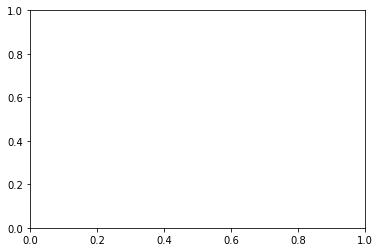

In [84]:
# Seleccionar la configuracion óptima de clusters

import seaborn as sns


<AxesSubplot:xlabel='iter', ylabel='sumas'>

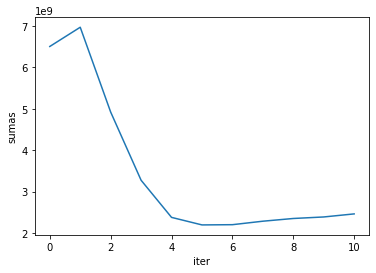

In [90]:
sns.lineplot(data=df_suma_varianzas_intra_cluster, y='sumas', x='iter')

In [91]:
df_suma_varianzas_intra_cluster.sort_values(by='sumas', ascending=True)

,sumas,iter
5,2.193962e+09,5
6,2.199600e+09,6
7,2.283515e+09,7
8,2.349246e+09,8
4,2.375764e+09,4
9,2.385997e+09,9
10,2.460082e+09,10
3,3.272184e+09,3
2,4.918764e+09,2
0,6.502255e+09,0
